In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import cosine_distances
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


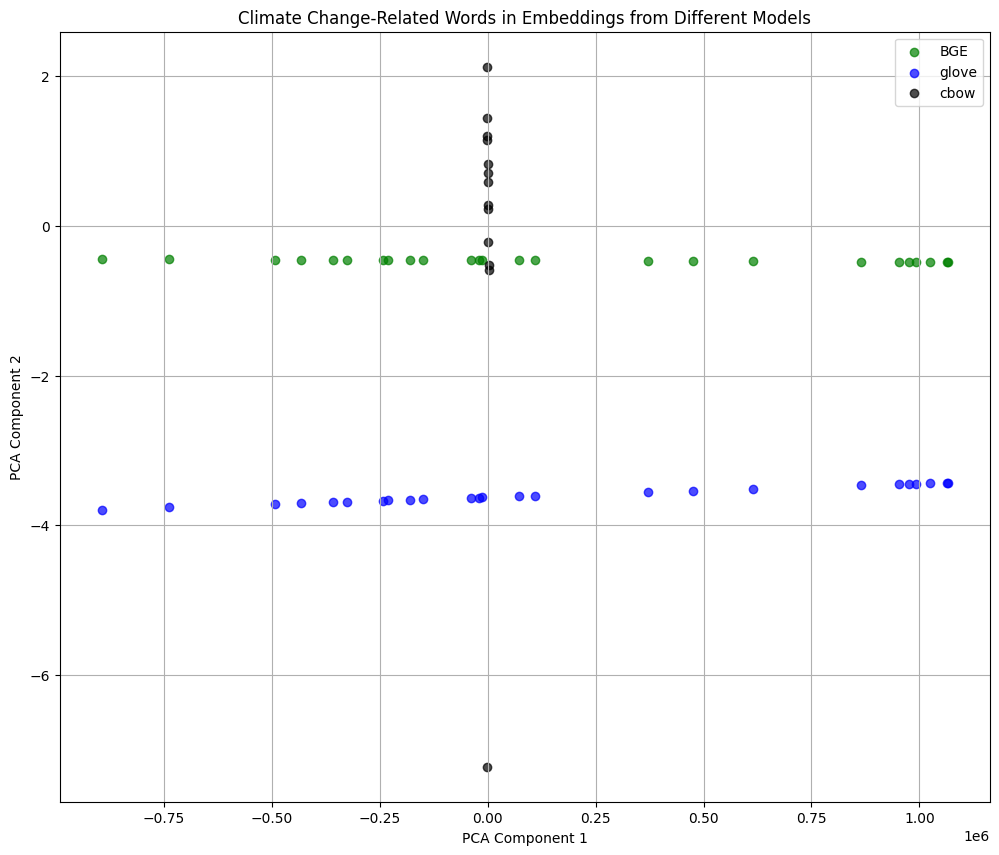

In [7]:
# Step 1: Load the embeddings from all three CSV files
files = ['/Users/fabianmahner/Downloads/bge_embeddings_1k.csv', 
         '/Users/fabianmahner/Downloads/glove_embeddings_1k.csv', 
         '/Users/fabianmahner/Downloads/cbow_embeddings_1k.csv']
 #Step 1: Load the embeddings
embeddings = []
labels = ['BGE', 'glove', 'cbow']
colors = ['green', 'blue', 'black']

for file in files:
    df = pd.read_csv(file)
    embeddings.append(df)

# Step 2: Filter for climate change-related words
selected_words = [
    "climate", "change", "global", "warming", "environment", "carbon", 
    "emissions", "temperature", "weather", "policy", "regulation", 
    "mitigation", "adaptation", "sustainability", "renewable", "health", 
    "disaster", "migration", "economy", "inequality", "justice", "science", 
    "technology", "innovation", "research", "data", "modeling", "awareness", 
    "denial", "activism", "education", "media", "protest", "energy", 
    "fossil", "fuels", "oil", "coal", "natural", "gas", "solar", "wind", 
    "agreement", "paris", "kyoto", "protocol", "un", "summit", 
    "negotiations", "biodiversity", "species", "ecosystem", "habitat", 
    "extinction", "deforestation" 
]

# Step 3: Visualize the results
plt.figure(figsize=(12, 10))

for i, file_df in enumerate(embeddings):
    label = labels[i]
    color = colors[i]
    
    # Ensure the selected words are in the current model's embeddings
    words = set(file_df['word'])
    filtered_words = [word for word in selected_words if word in words]
    
    if not filtered_words:
        continue
    
    # Extract embeddings for the selected words
    file_filtered = file_df[file_df['word'].isin(filtered_words)]
    word_embeddings = file_filtered.set_index('word').loc[filtered_words].values
    
    # Apply PCA to the current model's embeddings
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(word_embeddings)
    
    # Plot the PCA results
    for j, word in enumerate(filtered_words):
        x = pca_result[j, 0]
        y = pca_result[j, 1]
        plt.scatter(x, y, color=color, label=f'{label}' if j == 0 else "", alpha=0.7)
        #plt.text(x, y, word, fontsize=12, color=color)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Climate Change-Related Words in Embeddings from Different Models')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
